Let's learn more about the penguins dataset

In [91]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

Let's clean and visualise

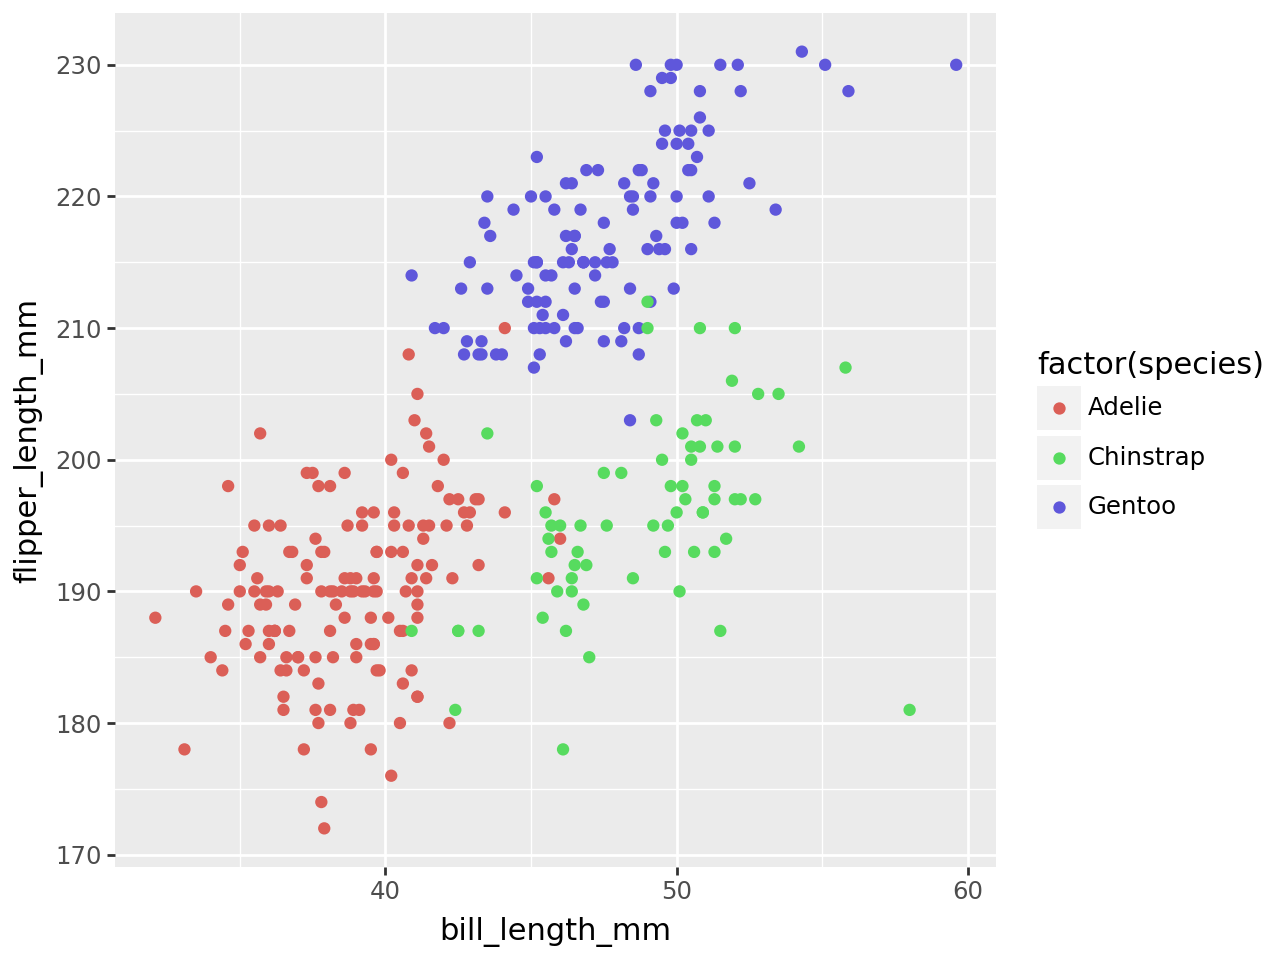

In [92]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

# Drop rows with missing values
penguins_cleaned = penguins.dropna()

(
    ggplot(penguins_cleaned, aes("bill_length_mm",
           "flipper_length_mm", color="factor(species)"))
    + geom_point()
)

# KMeans clustering

Okay! Let's try and cluster.

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

selected_features = ["bill_length_mm", "flipper_length_mm"]

features = penguins_cleaned[selected_features]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, algorithm="lloyd")
kmeans_labels = kmeans.fit_predict(features_scaled)

# TODO: Get help on SettingWithCopyWarning error
penguins_cleaned.loc[:, "cluster"] = kmeans.fit_predict(features_scaled)

Let's match up the clusters to the species by the cluster containing most predictions

In [100]:
cluster_species = penguins_cleaned.groupby(
    "species")["cluster"].agg(lambda x: x.value_counts().index[0])

cluster_species_df = cluster_species.reset_index()

penguins_cleaned.loc[:, "cluster"] = penguins_cleaned["cluster"].astype(str)

penguins_cleaned.loc[:, "cluster"] = penguins_cleaned["cluster"].map(
    cluster_species_df.set_index("cluster")["species"])

penguins_cleaned

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year    cluster  
0         3750.0    male  2007     Adelie  
1         3800.0  female  2007     Adelie  
2         3250.0  female  2007     Adelie  
4         3450.0  female  2007     Adelie  
5         3650.0    male  2007     Adelie  
..           ...     ...   ...        ...  
339       4000.0    male  2009  Chinstrap  
340       3400.0  female  2009  Chinstrap  
341       3775.0    male  2009  Chinstrap  
342       4100.0    male  2009     Gentoo  
343       3775.0  female  2009  Chinstrap  

[333 rows x 9 columns]

Let's now visualise how well the clustering worked:

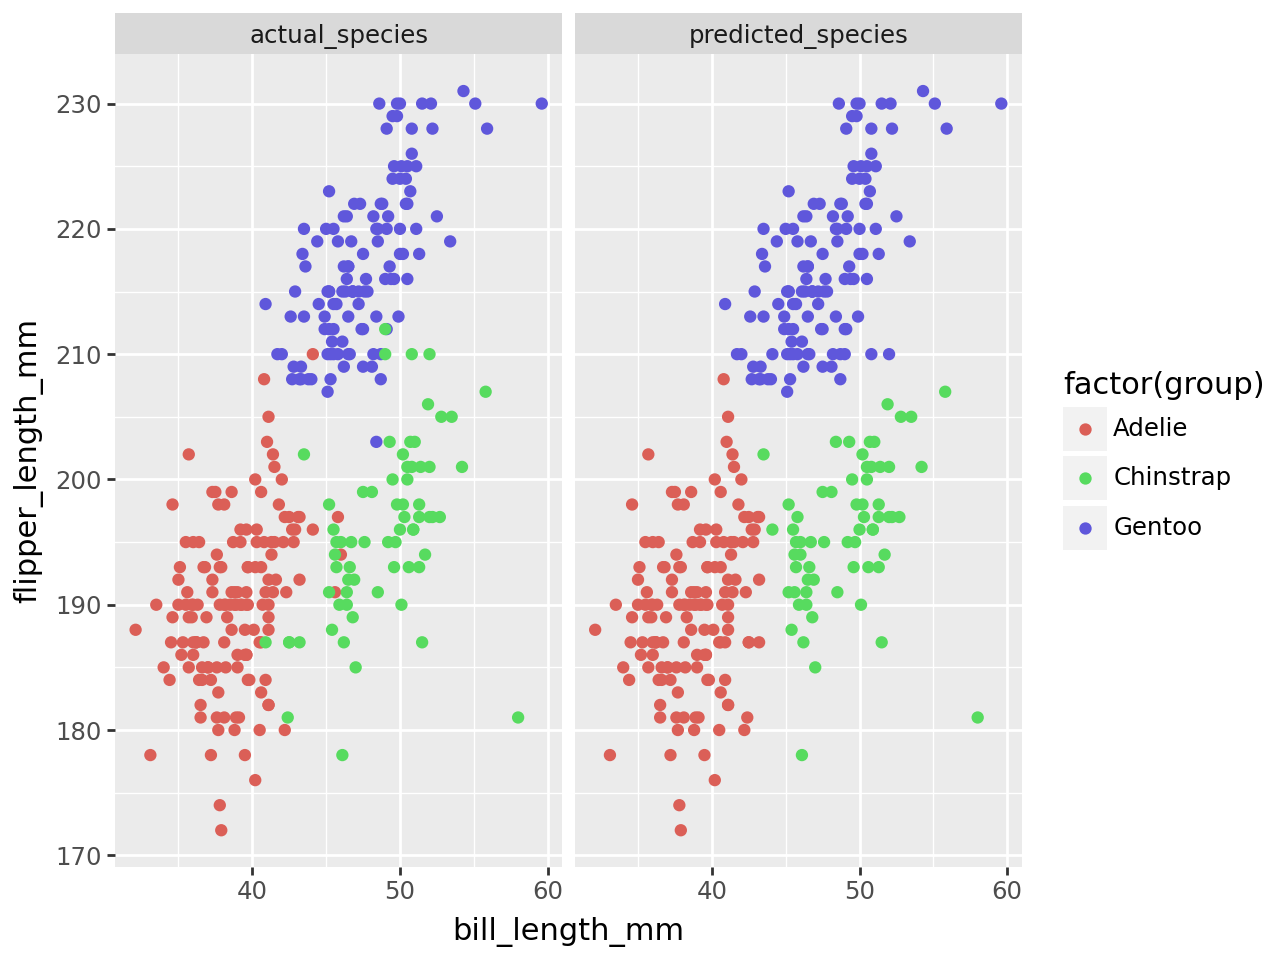

In [101]:
cols_compare = ["species",
                "cluster", "bill_length_mm", "flipper_length_mm"]
penguins_selected = penguins_cleaned[cols_compare]

penguins_selected = penguins_selected.rename(columns={
                         "species": "actual_species", "cluster": "predicted_species"})

penguins_clust_long = pd.melt(penguins_selected,
                              id_vars=["bill_length_mm", "flipper_length_mm"],
                              var_name="measure",
                              value_name="group")

(
    ggplot(penguins_clust_long, aes("bill_length_mm",
           "flipper_length_mm", color="factor(group)"))
    + geom_point()
    + facet_wrap("measure")
)

# DRAGONS

In [90]:
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df = pd.DataFrame(data)

# Sample vector
vector = [7, 8, 9]

# Add the vector as a new column to the DataFrame
df['new_col'] = vector